<a href="https://colab.research.google.com/github/GandhamSRILAKSHMI1357/FMML-module-lab3/blob/main/FMML_Module_4_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [ ]:
def f(x):
    return x ** 2 + x + 1

In [ ]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

NameError: name 'x_1' is not defined

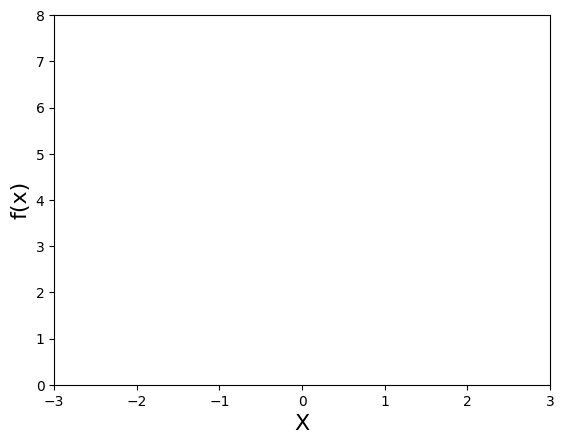

In [ ]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [ ]:
def df(x):
    return 2 * x + 1

In [ ]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [ ]:

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


NameError: name 'x_1' is not defined

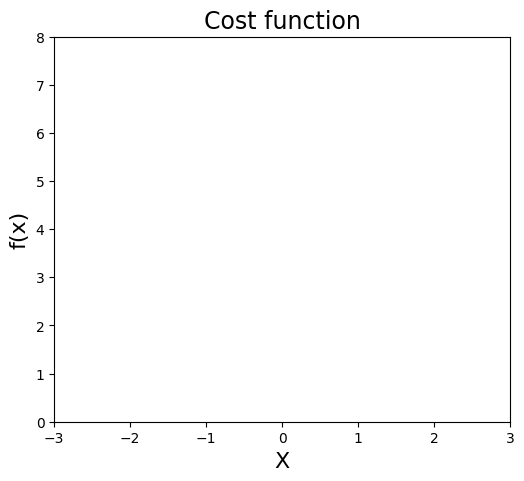

In [ ]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [ ]:

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

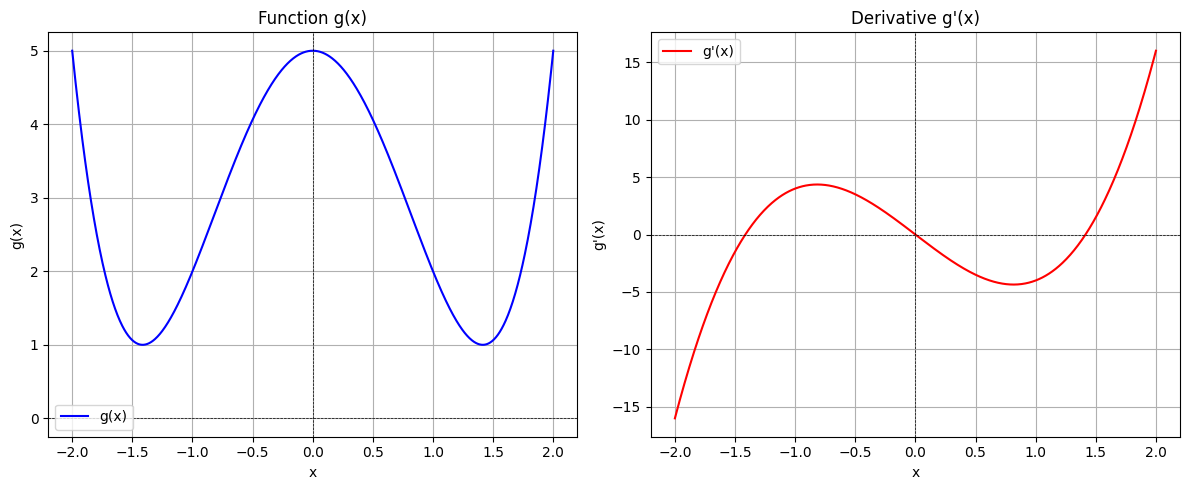

In [ ]:
# Plot function and derivative side by side like has been done earlier
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot g(x)
axs[0].plot(x_2, g(x_2), label='g(x)', color='blue')
axs[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[0].axvline(0, color='black', linewidth=0.5, linestyle='--')
axs[0].set_title("Function g(x)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("g(x)")
axs[0].legend()
axs[0].grid()

# Plot dg(x)/dx
axs[1].plot(x_2, dg(x_2), label="g'(x)", color='red')
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].set_title("Derivative g'(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("g'(x)")
axs[1].legend()
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

## Gradient Descent

In [ ]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


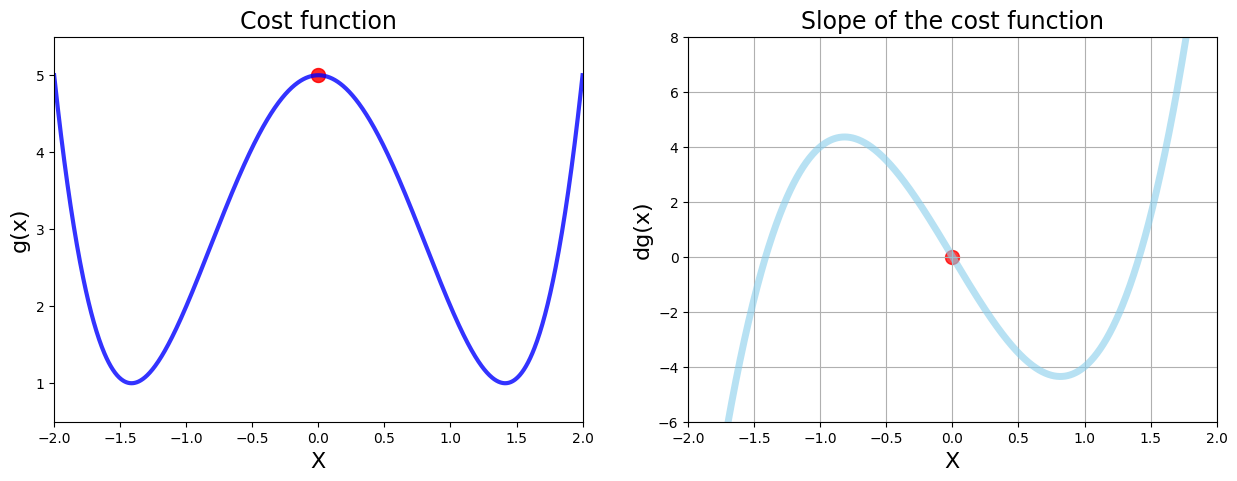

In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

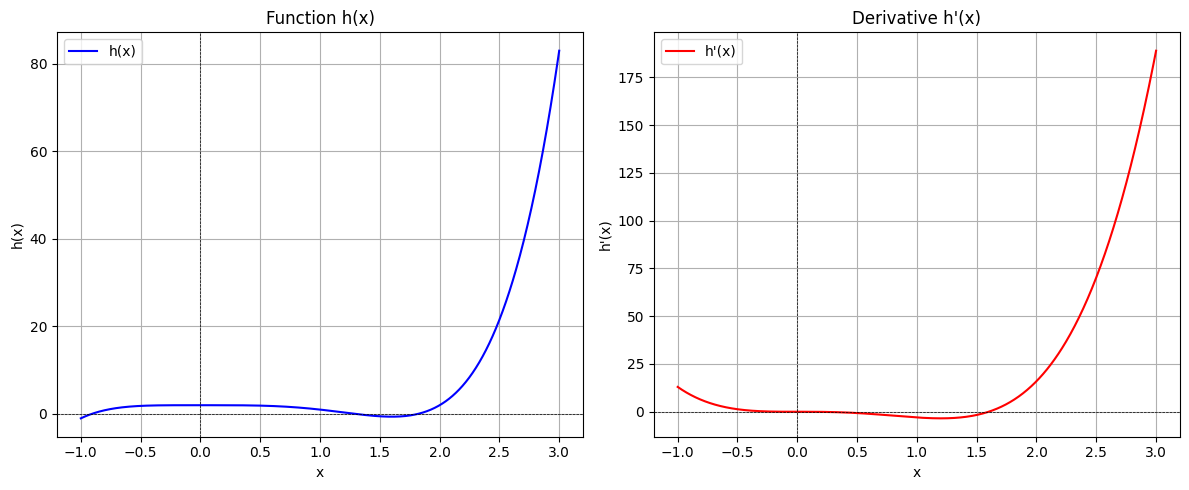

In [ ]:

# Define the function h(x) and its derivative h'(x)
def h(x):
    return x**5 - 2*x**4 + 2  # Define the function h(x)

def dh(x):
    return 5*x**4 - 8*x**3  # Define the derivative h'(x)

# Create data for plotting
x_3 = np.linspace(-1, 3, 1000)  # Extended range to observe divergence

# Plot the function and its derivative
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot h(x)
axs[0].plot(x_3, h(x_3), label="h(x)", color="blue")
axs[0].axhline(0, color="black", linewidth=0.5, linestyle="--")
axs[0].axvline(0, color="black", linewidth=0.5, linestyle="--")
axs[0].set_title("Function h(x)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("h(x)")
axs[0].legend()
axs[0].grid()

# Plot h'(x)
axs[1].plot(x_3, dh(x_3), label="h'(x)", color="red")
axs[1].axhline(0, color="black", linewidth=0.5, linestyle="--")
axs[1].axvline(0, color="black", linewidth=0.5, linestyle="--")
axs[1].set_title("Derivative h'(x)")
axs[1].set_xlabel("x")
axs[1].set_ylabel("h'(x)")
axs[1].legend()
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

#### Learning Rate

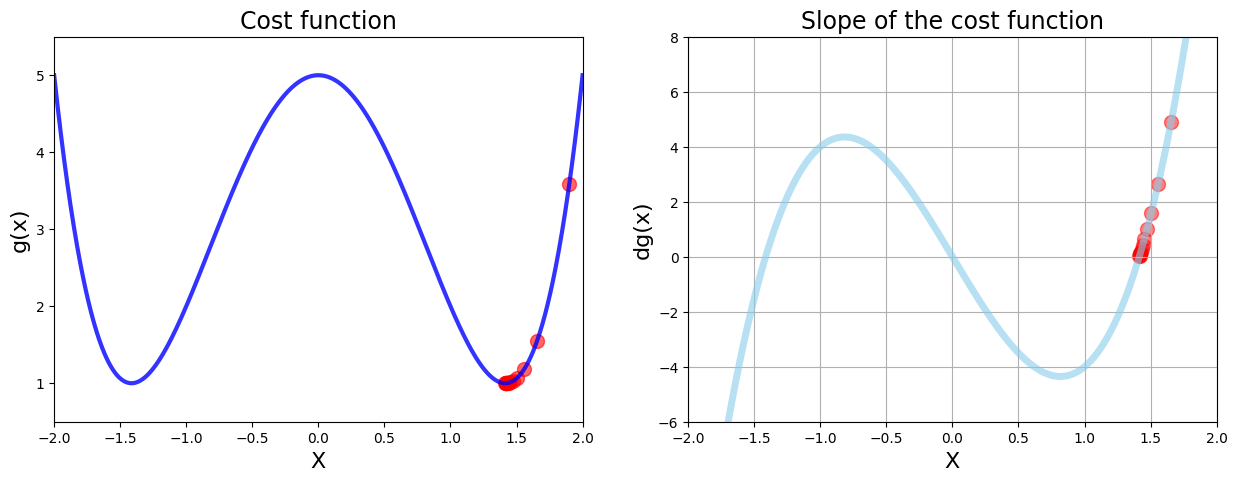

Number of steps is:  14


In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

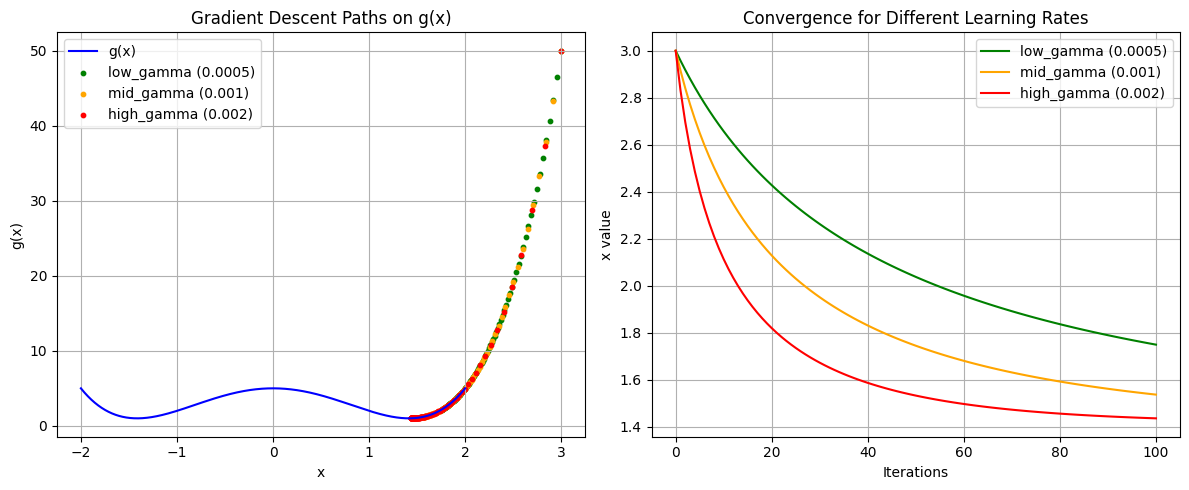

In [ ]:
##  Run gradient descent 3 times
##  Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
# Gradient descent implementation
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]  # Track x values
    for _ in range(max_iter):
        gradient = derivative_func(x)
        x_new = x - multiplier * gradient
        x_list.append(x_new)

        if abs(x_new - x) < precision:
            break

        x = x_new
    return x_list

# Run gradient descent for three learning rates
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment with an extremely high learning rate
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)



# Plotting the results
x_vals = np.linspace(-2, 2, 1000)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot g(x) and gradient descent paths
axs[0].plot(x_vals, g(x_vals), label="g(x)", color="blue")
axs[0].scatter(low_gamma, [g(x) for x in low_gamma], color="green", s=10, label="low_gamma (0.0005)")
axs[0].scatter(mid_gamma, [g(x) for x in mid_gamma], color="orange", s=10, label="mid_gamma (0.001)")
axs[0].scatter(high_gamma, [g(x) for x in high_gamma], color="red", s=10, label="high_gamma (0.002)")
axs[0].set_title("Gradient Descent Paths on g(x)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("g(x)")
axs[0].legend()
axs[0].grid()

# Plot convergence of x values
axs[1].plot(range(len(low_gamma)), low_gamma, label="low_gamma (0.0005)", color="green")
axs[1].plot(range(len(mid_gamma)), mid_gamma, label="mid_gamma (0.001)", color="orange")
axs[1].plot(range(len(high_gamma)), high_gamma, label="high_gamma (0.002)", color="red")
axs[1].set_title("Convergence for Different Learning Rates")
axs[1].set_xlabel("Iterations")
axs[1].set_ylabel("x value")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

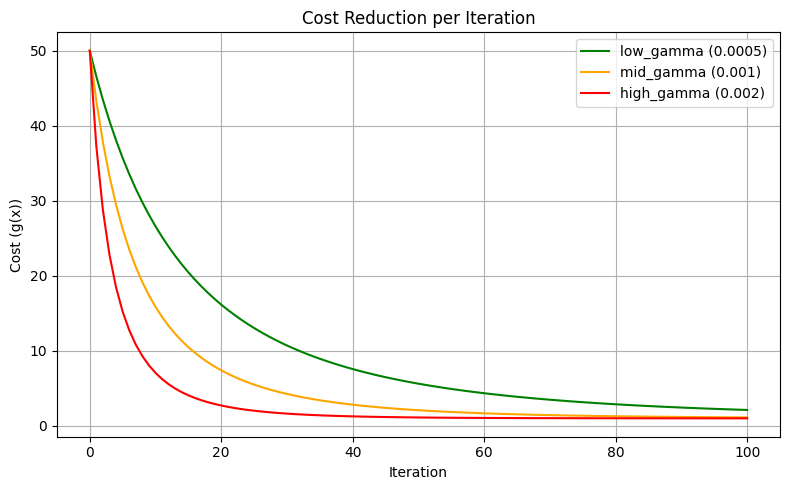

In [ ]:
##  Plot reduction in cost for each iteration

# Plot reduction in cost (g(x)) for each iteration
fig, ax = plt.subplots(figsize=(8, 5))

# Calculate g(x) for each iteration
low_cost = [g(x) for x in low_gamma]
mid_cost = [g(x) for x in mid_gamma]
high_cost = [g(x) for x in high_gamma]

# Plot the cost reduction
ax.plot(range(len(low_cost)), low_cost, label="low_gamma (0.0005)", color="green")
ax.plot(range(len(mid_cost)), mid_cost, label="mid_gamma (0.001)", color="orange")
ax.plot(range(len(high_cost)), high_cost, label="high_gamma (0.002)", color="red")

# Add labels, title, and legend
ax.set_title("Cost Reduction per Iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost (g(x))")
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

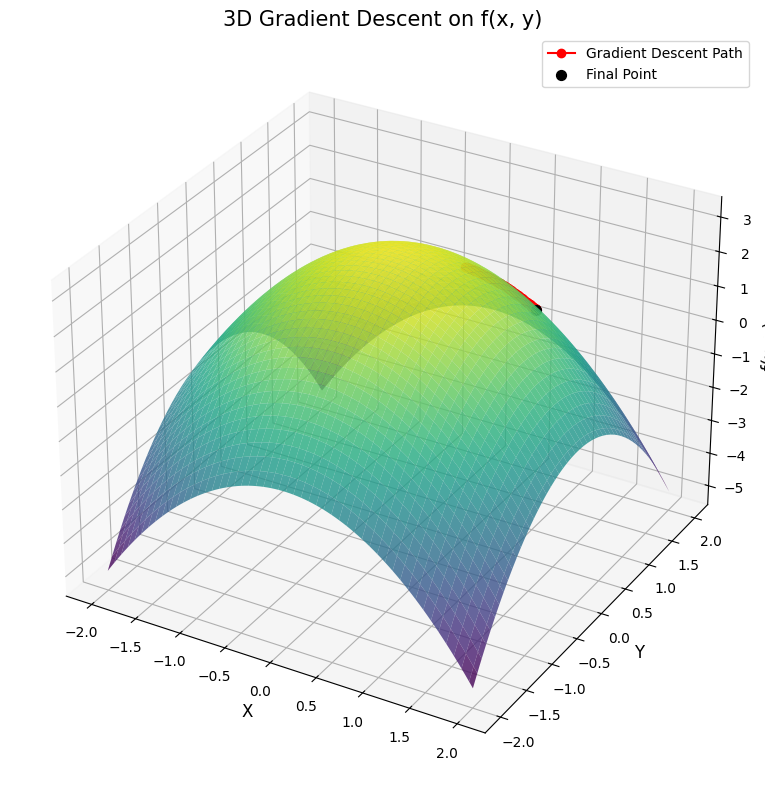

In [ ]:
# Define the function and its partial derivatives
def f(x, y):
    return 3- x**2 - y**2

def partial_fx(x, y):
    r = 3- x**2 - y**2
    return -2*x - (1 / r**2) * (-2*x)

def partial_fy(x, y):
    r = 3- x**2 - y**2
    return -2*y - (1 / r**2) * (-2*y)

# Gradient descent implementation for f(x, y)
def gradient_descent_2d(partial_fx, partial_fy, initial_guess, learning_rate, precision, max_iter):
    x, y = initial_guess
    path = [(x, y)]
    for _ in range(max_iter):
        grad_x = partial_fx(x, y)
        grad_y = partial_fy(x, y)
        x_new = x - learning_rate * grad_x
        y_new = y - learning_rate * grad_y
        path.append((x_new, y_new))

        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < precision:
            break

        x, y = x_new, y_new
    return path

# Run gradient descent
initial_guess = (0.5, 0.5)
learning_rate = 0.01
precision = 0.0001
max_iter = 500
path = gradient_descent_2d(partial_fx, partial_fy, initial_guess, learning_rate, precision, max_iter)

# Prepare data for visualization
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Extract path points
path_x, path_y = zip(*path)
path_z = [f(px, py) for px, py in path]

# Plot 3D Surface and Gradient Descent Path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)

# Path plot
ax.plot(path_x, path_y, path_z, color="red", label="Gradient Descent Path", marker="o")
ax.scatter(path_x[-1], path_y[-1], path_z[-1], color="black", label="Final Point", s=50)

# Labels and Title
ax.set_title("3D Gradient Descent on f(x, y)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.legend()

# Labels and Title
ax.set_title("3D Gradient Descent on f(x, y)", fontsize=15)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("f(x, y)", fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


NameError: name 'x_4' is not defined

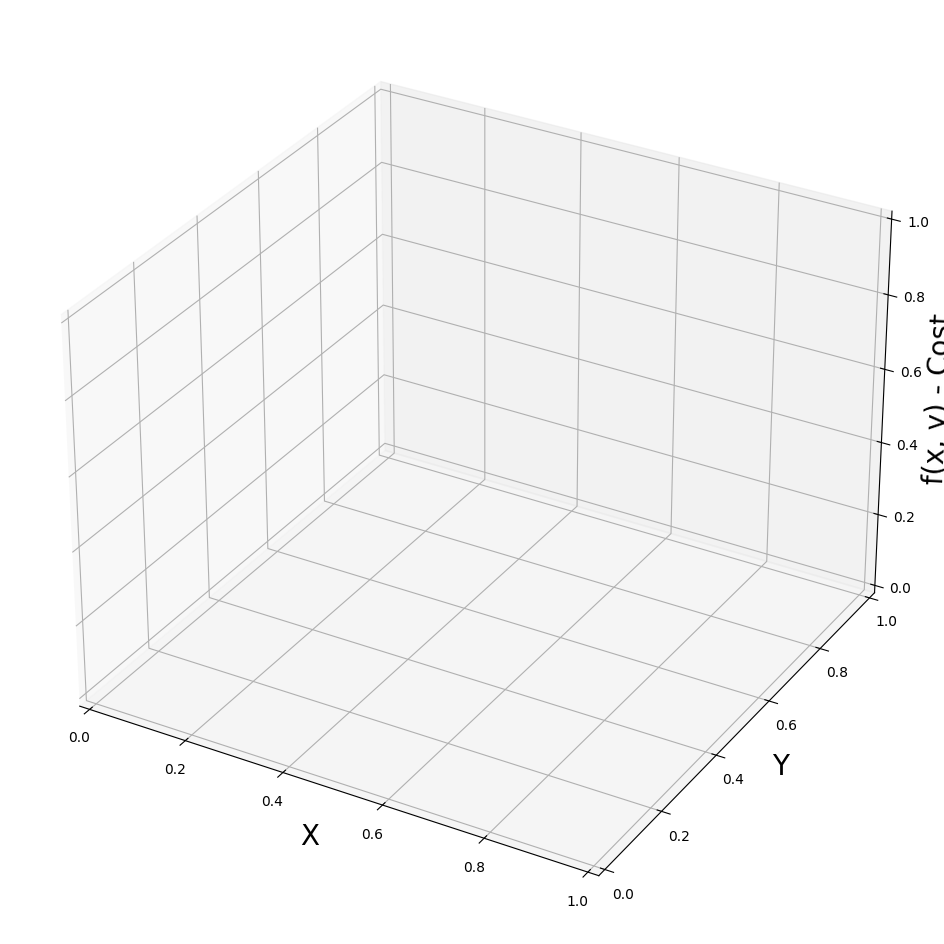

In [ ]:

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')  # Corrected line for 3D plotting

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Assuming f is your function
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap='coolwarm', alpha=0.4)

plt.show()



#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = −2x+ \frac{2x}{(3−x^2−y^2)^2} $$

#### $$\frac{\partial f}{\partial y} = −2y+ \frac{2y}{(3−x^2−y^2)^2} $$

In [ ]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  -x**2 - y**2 + 3
Partial derivative wrt x is:  -2*y
Value of f(x,y) at x=1.8 y=1.0 is:  -1.24000000000000
Value of partial derivative wrt x:  -3.60000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.16881096857237e+40 -6.49339426984649e+39]
Minimum occurs at x value of:  7.01286581143421e+39
Minimum occurs at y value of:  3.89603656190789e+39
The cost is:  -6.43593877809059e+79


In [ ]:


# Partial derivative functions example 4

def fpx(x, y):
    return -2*x + (2*x) / (3 - x**2 - y**2)**2

def fpy(x, y):
    return -2*y + (2*y) / (3 - x**2 - y**2)**2

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

NameError: name 'fpx' is not defined



```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)


NameError: name 'fpx' is not defined

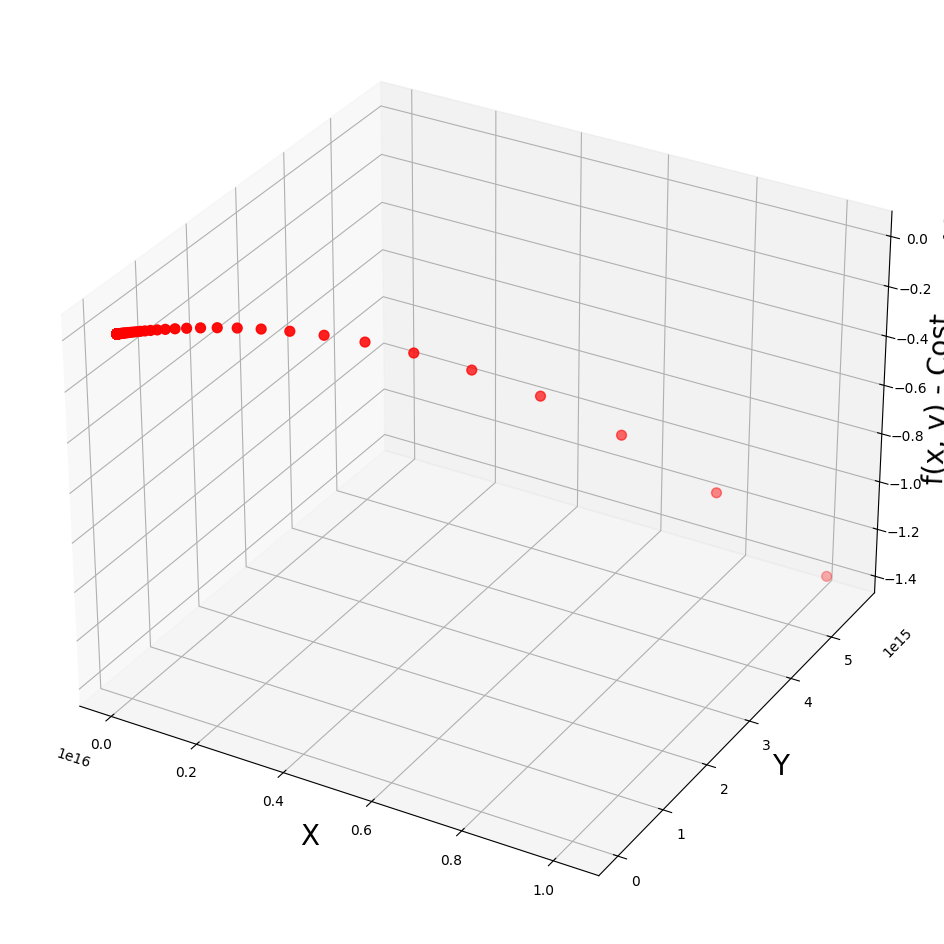

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


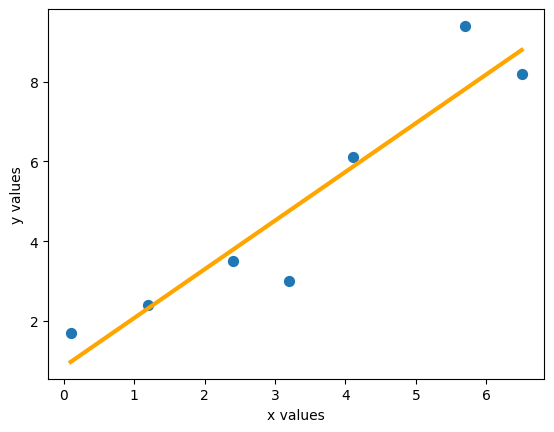

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    mse_calc = 1/7 * sum((y - y_hat)**2)
    mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

#### Calc MSE using nested for loops

In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-24-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


KeyboardInterrupt: 

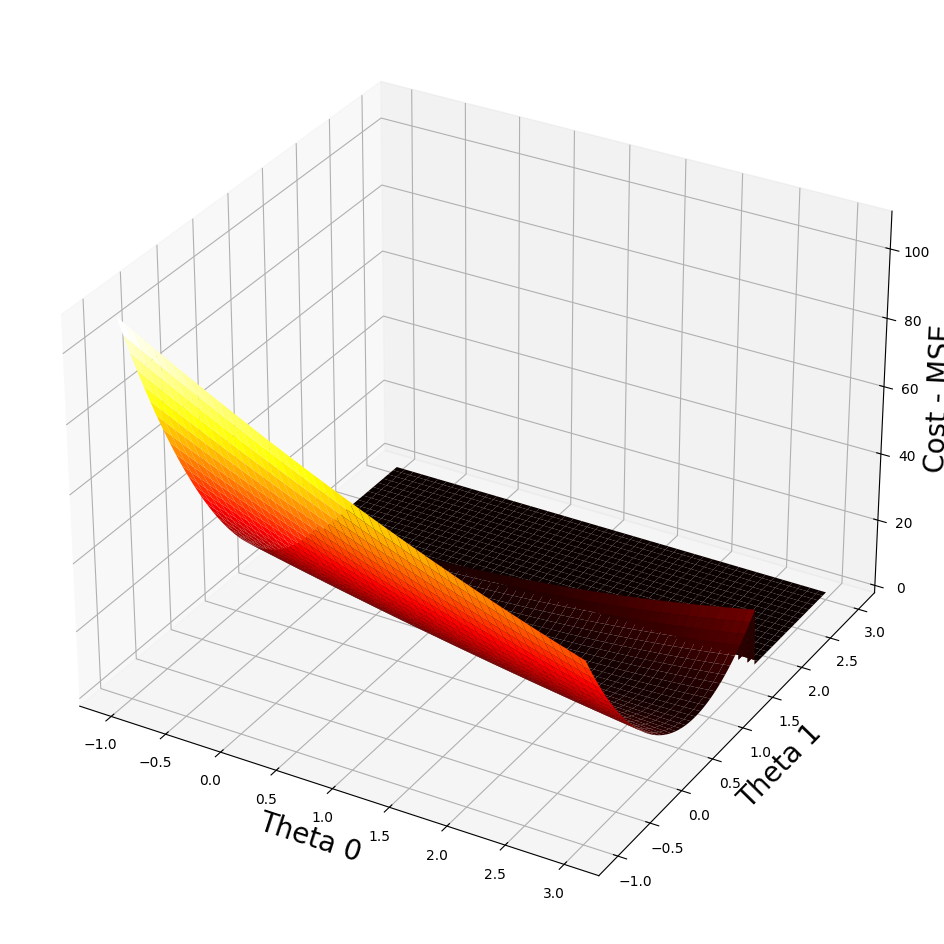

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.0
Min occurs at (i,j): (137, 192)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    return np.array([theta0_slope[0], theta1_slope[0]])
    return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


NameError: name 'plot_vals' is not defined

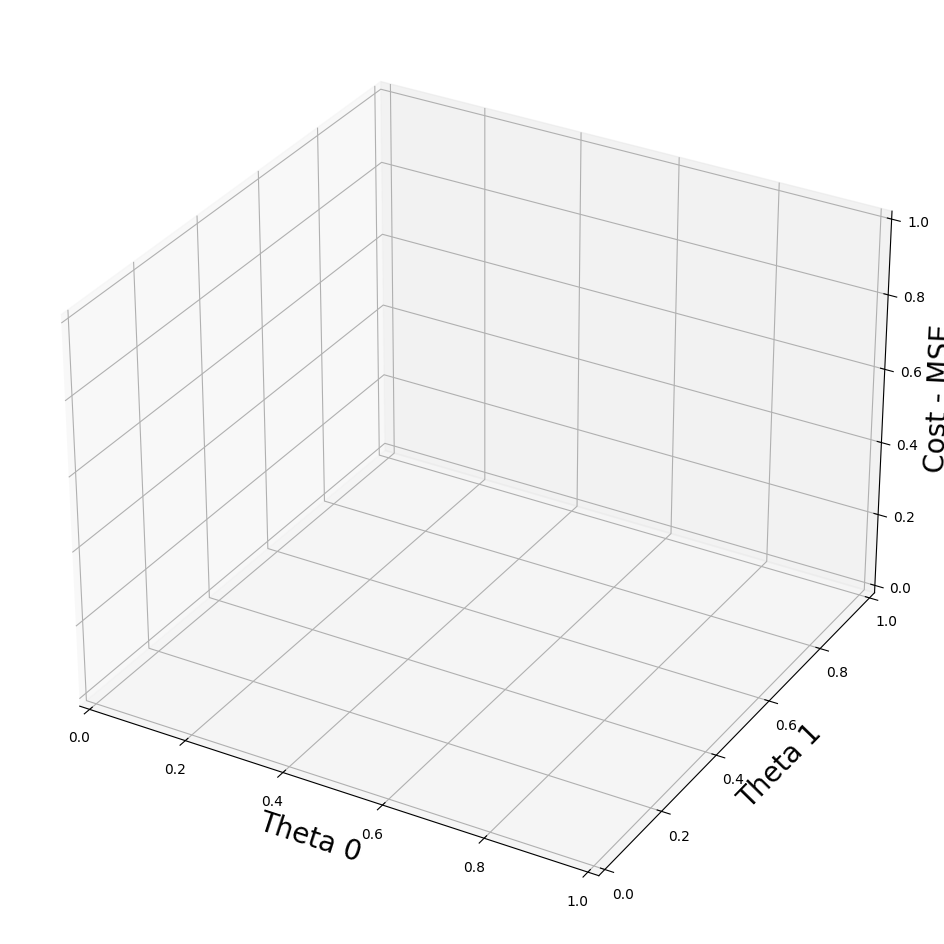

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()